<b> Introduction </b>

Most of the Machine Learning algorithms that are used for classification tend to work good with Balanced Datasets but not so much with Imbalanced Datasets,performance metrics such as accuracy still remain on the higher side but this doesn't mean that our model has 'learned' well.


To overcome such problems we have few methods to our aid such as:
<br>1.Up-Sampling the minority class
<br>2.Down-Sampling the majority class
<br>3.Using Penalize algorithms(Support Vector Machines)
<br>4.Using Ensemble Learning methods (such as Random Forests,AdaBoost)

In this notebook I would be implementing the above methods on a common dataset.
 

<b> About the Dataset: </b>
<br>Dataset being used is the 'Predicting a Pulsar Star' from Kaggle.(Link :- https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star).
Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.
The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.
Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score,average_precision_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv(r'C:\Users\admin\Desktop\My codes\pulsar_stars.csv')

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
columns=data.columns

In [6]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


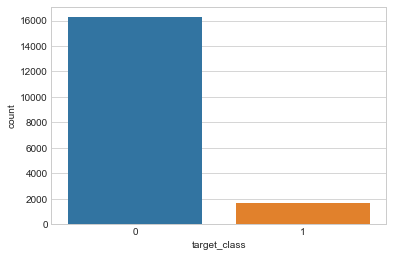

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='target_class',data=data)

The above figure shows the imbalance between classes in our Dataset.


In [8]:
data_1=data.copy()

# 1. Upscaling the minority class

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

In [9]:
from sklearn.utils import resample

In [10]:
class_1_df=data_1[data_1['target_class']==1]

In [11]:
class_0_df=data_1[data_1['target_class']==0]

In [12]:
len(class_1_df),len(class_0_df)

(1639, 16259)

In [13]:
df_minority_upsampled = resample(class_1_df, 
                                 replace=True,     # sample with replacement
                                 n_samples=int(0.75*data.shape[0])//2,    # to match majority class
                                 random_state=123) # reproducible results


In [14]:
training_data_up=pd.concat([df_minority_upsampled,class_0_df.iloc[0:int(0.75*data.shape[0])//2]])

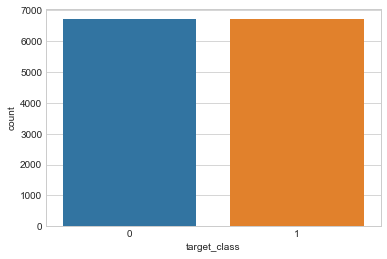

In [15]:
sns.countplot(x='target_class',data=training_data_up)

In [16]:
testing_data_up=data_1.iloc[int(0.75*data_1.shape[0]):]

In [17]:
training_labels_up=training_data_up.pop('target_class')
testing_labels_up=testing_data_up.pop('target_class')

In [18]:
scaler=StandardScaler()
x=scaler.fit_transform(training_data_up)

In [19]:
train_up=pd.DataFrame(data=x,columns=columns[0:-1])

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model_log_reg=LogisticRegression()
model_log_reg.fit(train_up,training_labels_up)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
s=StandardScaler()
y=s.fit_transform(testing_data_up)

In [23]:
test_up=pd.DataFrame(data=y,columns=columns[0:-1])

In [24]:
pred_up=model_log_reg.predict(test_up)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
acc_logistic_upscale=accuracy_score(testing_labels_up,pred_up)

In [27]:
acc_logistic_upscale

0.3224581005586592

<b>Accuracy is only 32.2% </b> 

Now we will be using <b> SVM </b> which is a Penalizing algorithm.

In [28]:
from sklearn.svm import SVC

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
tuned_params=[{'kernel':['rbf'],'gamma':[0.1],'C':[1]},
             {'kernel':['linear'],'C':[1]}]

In [54]:
data.sample(frac=1)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
6061,150.296875,57.749643,-0.313894,-0.568722,11.099498,43.812969,4.429271,18.975267,0
16043,155.203125,45.847294,-0.230128,-0.024023,4.428930,25.421480,6.583754,45.789819,0
9348,122.851562,47.958819,0.030024,-0.139650,6.658027,32.462805,5.101732,25.913703,0
11122,12.023438,39.739870,5.089785,24.899401,156.122910,74.022701,-0.432161,-1.017397,1
2769,112.335938,54.860089,0.413171,-0.299531,3.111204,16.193340,8.214020,89.395850,0
15526,131.726562,40.774669,0.065483,0.855359,1.136288,13.611818,13.560509,199.548296,0
12233,124.812500,53.153485,-0.382617,-0.005656,8.220736,38.041956,5.146605,25.712373,0
16940,103.492188,44.114375,0.261139,0.279443,4.470736,25.794207,6.592571,45.928570,0
15927,125.968750,51.607130,0.106988,-0.515704,2.594482,16.903779,9.371372,104.136934,0
168,108.304688,40.864020,0.502060,1.097573,2.622910,17.519815,8.736840,88.016597,0


In [55]:
train,test = train_test_split(data)

In [56]:
training_data=data.iloc[0:int(0.75*data.shape[0])]
testing_data=data.iloc[int(0.75*data.shape[0]):]

In [57]:
training_labels=train.pop('target_class')
testing_labels=test.pop('target_class')

In [58]:
scalar=StandardScaler()
x=scalar.fit_transform(train)

In [59]:
training_data=pd.DataFrame(data=x,columns=columns[0:-1])

In [60]:
model=GridSearchCV(SVC(),tuned_params,cv=5,scoring='precision')
model.fit(training_data,training_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]}, {'kernel': ['linear'], 'C': [1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [61]:
print(model.cv_results_)

{'mean_fit_time': array([0.32622027, 0.25856814]), 'std_fit_time': array([0.02646839, 0.01269414]), 'mean_score_time': array([0.04364247, 0.01883287]), 'std_score_time': array([0.00174512, 0.0004004 ]), 'param_C': masked_array(data=[1, 1],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, --],
             mask=[False,  True],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'linear'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}], 'split0_test_score': array([0.95238095, 0.94495413]), 'split1_test_score': array([0.96858639, 0.96825397]), 'split2_test_score': array([0.95022624, 0.94690265]), 'split3_test_score': array([0.91855204, 0.92825112]), 'split4_test_score': array([0.93181818, 0.92376682]), 'mean_test_score': array([0.94431462, 0.94242852]), 'std_t

In [62]:
model.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [63]:
model.best_score_

0.9443146221024166

In [64]:
scaler_test=StandardScaler()
x_test=scaler_test.fit_transform(test)

In [65]:
testing_data=pd.DataFrame(data=x_test,columns=columns[0:-1])

In [66]:
y_actual,y_pred=testing_labels,model.predict(testing_data)

In [67]:
acc_svm=accuracy_score(y_actual,y_pred)

In [68]:
acc_svm

0.9801117318435755

In [69]:
from sklearn.metrics import precision_score

In [70]:
precision_score_svm=precision_score(y_true=y_actual,y_pred=y_pred)


In [71]:
precision_score_svm

0.9455587392550143

Now we will be using an <b> Ensemble Learning </b> method ,<b> Random Forest </b>. 

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf=RandomForestClassifier()

In [74]:
rf.fit(training_data,training_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
pred_rf=rf.predict(testing_data)

In [76]:
pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
from sklearn.metrics import classification_report

In [79]:
prec_rf=precision_score(testing_labels,pred_rf)

In [80]:
prec_rf

0.9478260869565217

 Results show that both <b> SVM & Random Forest </b> work well with unbalanced Dataset.